In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

* case: observation number
* site: The site number where the possum was trapped.
* Pop: Population, either Vic (Victoria) or other (New South Wales or Queensland). (Vic=0, other=1)
* sex: Gender, either m (male) or f (female). (m=0, f=1)
* age: Age.
* hdlngth: Head length, in mm.
* skullw: Skull width, in mm.
* totlngth: Total length, in cm.
* taill: Tail length, in cm.
* footlgth: foot length
* earconch: ear conch length
* eye: distance from medial canthus to lateral canthus of right eye
* chest: chest girth (in cm)
* belly: belly girth (in cm)

### Задача 1
##### Попробуем определить тип популяции опоссумов по их размерам

* Выберите и оставьте числовые признаки, по которым будете определять тип животных, и целевую переменную - Рор
* Закодируйте значения по столбцу Рор в 0 и 1 (можно использовать метод LabelEncoder)
* Разделите данные на выборку для обучения и тестирования (в соотношении 80 - тренировочная, 20 - тестовая)
* Постройте модель LDA
* Рассчитайте точность вашей модели на тестовой выборке

In [2]:
df = pd.read_csv('/Users/shu/netology/files_from_netology/Файлы_к_ДЗ_Классификация_и_кластеризация/possum.csv')

In [3]:
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [5]:
# есть пропущеные значение в столбце age и footlgth

df_test = df.copy()

In [6]:
# заполним пропуски модой в столбце age

df_test.age = df_test.age.fillna(df_test.age.mode()[0])

In [7]:
df_test[df_test.age.isna()]

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly


In [8]:
# # заполним пропуски модой в столбце age footlgth

df_test.footlgth = df_test.footlgth.fillna(df_test.groupby(['sex','Pop']).footlgth.transform(lambda x: x.mode()[0]))

In [9]:
df_test[df_test.footlgth.isna()]

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly


In [10]:
# посмотрим на сколько изменились данные в датасете
print('age test', '\n\n', df_test.describe().age)
print('====================')
print(df.describe().age)
print()
print('^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^')
print('footlgth test', '\n\n',df_test.describe().footlgth)
print('====================')
print(df.describe().footlgth)

age test 

 count    104.000000
mean       3.817308
std        1.894112
min        1.000000
25%        2.750000
50%        3.000000
75%        5.000000
max        9.000000
Name: age, dtype: float64
count    102.000000
mean       3.833333
std        1.909244
min        1.000000
25%        2.250000
50%        3.000000
75%        5.000000
max        9.000000
Name: age, dtype: float64

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
footlgth test 

 count    104.000000
mean      68.500962
std        4.394580
min       60.300000
25%       64.650000
50%       68.100000
75%       72.550000
max       77.900000
Name: footlgth, dtype: float64
count    103.000000
mean      68.459223
std        4.395306
min       60.300000
25%       64.600000
50%       68.000000
75%       72.500000
max       77.900000
Name: footlgth, dtype: float64


Нет существенных изменений, поэтому заполним данные в нашем датасете

In [11]:
df.age = df.age.fillna(df.age.mode()[0])
df.footlgth = df.footlgth.fillna(df.groupby(['sex','Pop']).footlgth.transform(lambda x: x.mode()[0]))

In [12]:
df.Pop.unique()

array(['Vic', 'other'], dtype=object)

In [13]:
# заменяем значение в столбце Pop, где Vic = 0, other = 1

df.loc[df.Pop == 'Vic', 'Pop'] = 0
df.loc[df.Pop == 'other', 'Pop'] = 1

In [14]:
df.Pop.unique()

array([0, 1], dtype=object)

In [15]:
# заменяем значение в столбце sex, где m = 0, f = 1

df.loc[df.sex == 'm', 'sex'] = 0
df.loc[df.sex == 'f', 'sex'] = 1

In [16]:
# меняем тип данных на целые значения

df[['Pop', 'sex']] = df[['Pop', 'sex']].astype('int')

In [17]:
# Пропущенных данных нет

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    int64  
 3   sex       104 non-null    int64  
 4   age       104 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  104 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(4)
memory usage: 11.5 KB


In [18]:
df.describe()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,52.500000,3.625000,0.557692,0.413462,3.817308,92.602885,56.883654,87.088462,37.009615,68.500962,48.130769,15.046154,27.000000,32.586538
std,30.166206,2.349086,0.499066,0.494839,1.894112,3.573349,3.113426,4.310549,1.959518,4.394580,4.109380,1.050374,2.045597,2.761949
min,1.000000,1.000000,0.000000,0.000000,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,40.300000,12.800000,22.000000,25.000000
25%,26.750000,1.000000,0.000000,0.000000,2.750000,90.675000,54.975000,84.000000,35.875000,64.650000,44.800000,14.400000,25.500000,31.000000
50%,52.500000,3.000000,1.000000,0.000000,3.000000,92.800000,56.350000,88.000000,37.000000,68.100000,46.800000,14.900000,27.000000,32.500000
75%,78.250000,6.000000,1.000000,1.000000,5.000000,94.725000,58.100000,90.000000,38.000000,72.550000,52.000000,15.725000,28.000000,34.125000
max,104.000000,7.000000,1.000000,1.000000,9.000000,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.000000,40.000000


In [19]:
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,0,0,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,0,1,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,0,1,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,0,1,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,0,1,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [20]:
X = df.iloc[:,5:]
y = df.Pop

In [21]:
# разделяем выборку на тренировочную и тестовую

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [22]:
# импортируем LDA-функционал

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [23]:
lda = LinearDiscriminantAnalysis()

In [24]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [25]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1])

In [26]:
y_test.reset_index(drop=True, inplace=True)

In [27]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

In [28]:
result

,Pop,Unnamed 0
0,0,0
1,1,1
2,1,1
3,1,1
4,0,0
5,1,1
6,1,1
7,1,1
8,0,0
9,0,0


In [29]:
# расчет точности - отношение верных прогнозов к общему количеству позиций
# является хорошей метрикой для сбалансированных классов
# (наблюдений в категориях примерно одинаковое количество)

from sklearn.metrics import accuracy_score

In [30]:
accuracy_score(y_test, lda.predict(X_test))

1.0

In [31]:
# коэффициенты дискриминатных линий
lda.coef_

array([[ 1.28862856,  0.43992648, -0.18355359,  2.56815001, -2.25060385,
        -2.20917459, -0.73878147, -1.04224793, -0.05415183]])

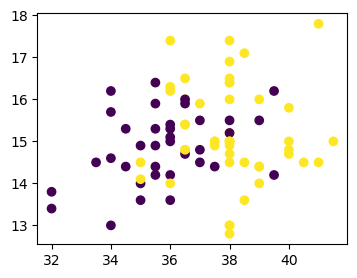

In [34]:
# визуализируем дискриминантную линию только по 2 признакам

plt.figure(figsize=(4,3))
plt.scatter(x=X_train['taill'], y=X_train['eye'], c=y_train)
plt.show()

### Задача 2

Теперь кластеризируем страны на основании показателей импорта и экспорта



* country: Name of the country
* child_mort: Death of children under 5 years of age per 1000 live births
* exports: Exports of goods and services per capita. Given as %age of the GDP per capita
* health: Total health spending per capita. Given as %age of GDP per capita
* imports: Imports of goods and services per capita. Given as %age of the GDP per capita
* income: Net income per person
* inflation: The measurement of the annual growth rate of the Total GDP
* life_expec: The average number of years a new born child would live if the current mortality patterns are to  remain the same
* total_fer: The number of children that would be born to each woman if the current age-fertility rates remain the same.
* gdpp: The GDP per capita. Calculated as the Total GDP divided by the total population.

Для выполнения задания:

* Выберите и оставьте только те признаки, по которым будете проводить кластерный анализ.
* Подберите оптимальное число кластеров для алгоритма K-means.
* Визуализируйте полученную кластеризацию.
* Проверьте правильность выбора кластеров с помощью метода локтя.
* Примените алгомеративную кластеризацию с учётом рассчитанного методом локтя оптимального количества кластеров.
* Визуализируйте результат.

In [35]:
df_country = pd.read_csv('/Users/shu/netology/files_from_netology/Файлы_к_ДЗ_Классификация_и_кластеризация/Country-data.csv')

In [36]:
df_country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [37]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [38]:
df_country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [39]:
# Проверяем на пропуски

df_country.isna().any()

country       False
child_mort    False
exports       False
health        False
imports       False
income        False
inflation     False
life_expec    False
total_fer     False
gdpp          False
dtype: bool

In [40]:
df_country.duplicated().sum()

0

/var/folders/ks/bqxz1yvx2mjcsnh9lynjm30c0000gn/T/ipykernel_95339/3281248378.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_country.corr().round(2), annot = True, square = True, linewidths=1, linecolor='gray')


<Axes: >

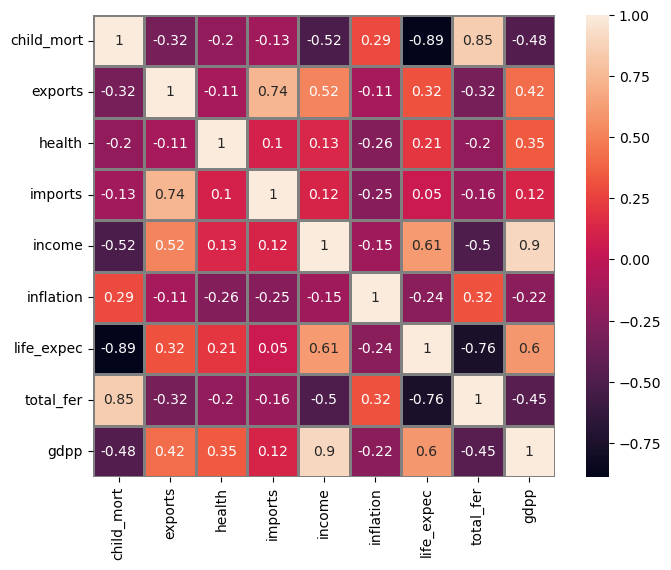

In [41]:
# смотрим на корреляцию данных. Желательно, чтобы данные не сильно коррелировали и выгладили как облако

plt.figure(figsize= (8, 6))

sns.heatmap(df_country.corr().round(2), annot = True, square = True, linewidths=1, linecolor='gray')

In [42]:
# Корреляция высокая

df_country.exports.corr(df_country.imports)

0.7373808339554992

In [43]:
df_country[['exports', 'imports']].corr()

,exports,imports
exports,1.000000,0.737381
imports,0.737381,1.000000


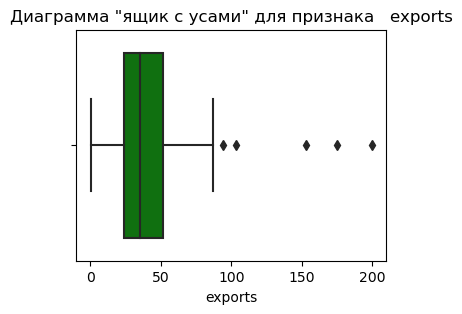

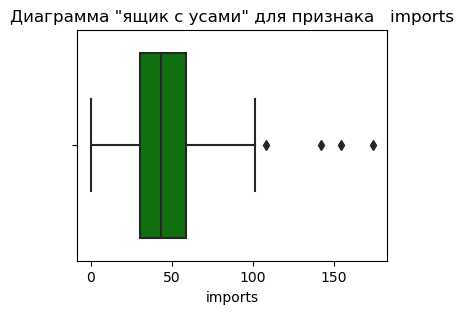

In [44]:
# Есть выбросы

for col in df_country[['exports','imports']]:
    
    plt.figure(figsize=(4,3))
    sns.boxplot(data=df_country, x=col, color='green')
    plt.title('Диаграмма "ящик с усами" для признака   ' + col)


In [45]:
# for i, num in enumerate(df_country['country']):
#     df_country.loc[df_country['country'] == num, 'country_num'] = i+1
# df_country.head()

In [46]:
# df_country.country_num = df_country.country_num.astype('int')

In [47]:
# x = df_country.drop(['country','country_num'], axis=1)
# y = df_country['country_num']

In [48]:
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [49]:
# X_train.head()

In [50]:
# импортируем LDA-функционал

# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [51]:
# lda = LinearDiscriminantAnalysis()

In [52]:
# lda.fit(X_train, y_train)

In [53]:
df_country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [54]:
x = df_country.loc[(df_country['exports'] < 100) & (df_country['imports'] < 100), ['exports','imports']].values

/Users/shu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/shu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/shu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/shu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'au

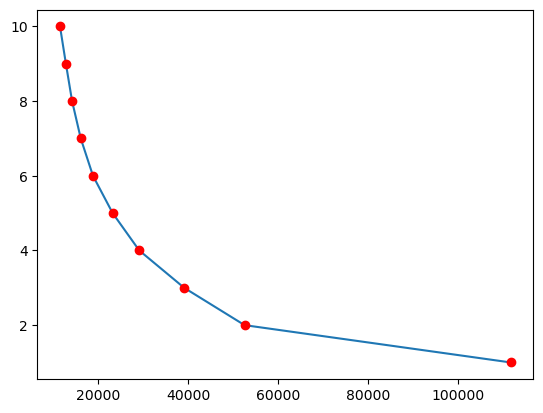

In [55]:
# Используем метод локтя и смотрим какое колличество кластеров нужно

from sklearn.cluster import KMeans

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++').fit(x)
    wcss.append( kmeans.inertia_ )
    
plt.plot(wcss, range(1,11))
plt.plot(wcss, range(1,11), 'ro')

/Users/shu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/shu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


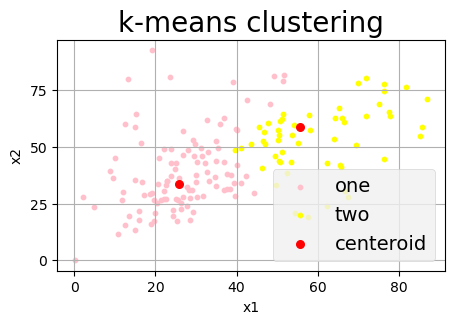

In [56]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

plt.figure(figsize=(5,3))

kmeans = KMeans(n_clusters=2, init='k-means++').fit(x)
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)

plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 10, c = 'pink', label = 'one')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 10, c = 'yellow', label = 'two')
# plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 10, c = 'cyan', label = 'two')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s = 30, c = 'red' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('k-means clustering', fontsize = 20)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc=4)
plt.grid()